# Introduction to Tensorflow

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("./data/", one_hot=True)

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz


In [5]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [6]:
single_image = mnist.train.images[1].reshape(28,28)

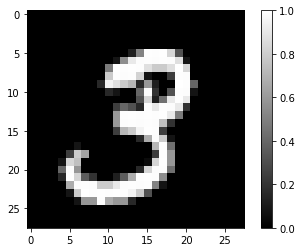

In [7]:
plt.imshow(single_image, cmap="gist_gray")
plt.colorbar()

In [8]:
#Placeholder
X = tf.placeholder(tf.float32, shape=[None, 784])

In [9]:
#Variables
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [10]:
#Create graph operations
y = tf.matmul(X,W) + b

In [11]:
#Loss function
y_true = tf.placeholder(tf.float32, [None, 10])

In [12]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))

In [13]:
#Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

In [14]:
init = tf.global_variables_initializer()

In [15]:
with tf.Session() as sess:
    sess.run(init)
    for step in range(1000):
        batch_X, batch_y = mnist.train.next_batch(100)
        sess.run(train, feed_dict = {X: batch_X, y_true: batch_y})
    #Evaluate a model
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1))
    #[True, False, True, True ... ] -> [1,0,1,1...]
    acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print(sess.run(acc, feed_dict = {X:mnist.test.images, y_true:mnist.test.labels}))    

0.9199


# CNN approach

In [16]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape,stddev=0.1)
    return tf.Variable(init_random_dist)

In [17]:
def init_bias(shape):
    init_bias_val = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_val)

In [18]:
def conv2d(x,W):
    return tf.nn.conv2d(x,W,strides=[1,1,1,1], padding='SAME')

In [19]:
def max_pool(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [20]:
def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W) + b)

In [29]:
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer,W) + b

In [22]:
x = tf.placeholder(tf.float32, shape=[None, 784])

In [23]:
y_true = tf.placeholder(tf.float32, shape=[None, 10])

In [24]:
x_image = tf.reshape(x, [-1, 28,28,1])

In [25]:
convo_1 = convolutional_layer(x_image, shape=[5,5,1,32])

In [27]:
convo_1_pooling = max_pool_2by2(convo_1)

# Manual creation of RNN

In [32]:
import theano

In [31]:
y

<tf.Tensor 'add:0' shape=(?, 10) dtype=float32>

In [2]:
import tensorflow as tf

In [3]:
import keras

/Users/tari/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
